In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys

import numpy as np
import pandas as pd
import matplotlib as mpl

sys.path.insert(0, '..')
from context.nd_array.nd_array.normalize_2d_array import normalize_2d_array
from context.fit_skew_t_pdf import fit_skew_t_pdf
from context.fit_skew_t_pdfs import fit_skew_t_pdfs
from context.compute_context import compute_context
from context.make_context_matrix_and_summarize_context import *
from context.plot_context import plot_context

In [ ]:
gene_x_cell_line = pd.read_table('gene_x_cell_line.tsv', index_col=0)

gene_x_cell_line = pd.DataFrame(
    normalize_2d_array(gene_x_cell_line.values, '-0-'),
    index=gene_x_cell_line.index,
    columns=gene_x_cell_line.columns)

gene_x_cell_line

In [ ]:
array_1d = gene_x_cell_line.loc['KRAS']

In [ ]:
n, location, scale, df, shape = fit_skew_t_pdf(array_1d)
print('N={}\tLocation={:.3f}\tScale={:.3f}\tDF={:.3f}\tShape={:.3f}'.format(
    n, location, scale, df, shape))

n, location, scale, df, shape = fit_skew_t_pdf(
    array_1d, fit_fixed_location=10, fit_fixed_scale=10)
print('N={}\tLocation={:.3f}\tScale={:.3f}\tDF={:.3f}\tShape={:.3f}'.format(
    n, location, scale, df, shape))

In [ ]:
context_dict = compute_context(array_1d)

for key, value in context_dict.items():
    print(key)
    print(value)
    print(value.shape)
    print()

In [ ]:
feature_x_skew_t_pdf_fit_parameter = fit_skew_t_pdfs(gene_x_cell_line)

feature_x_skew_t_pdf_fit_parameter

In [ ]:
context__feature_x_sample, feature_context_summary = make_context_matrix_and_summarize_context(
    gene_x_cell_line)

In [ ]:
context__feature_x_sample

In [ ]:
feature_context_summary

In [ ]:
for feature, feature_vector in gene_x_cell_line.iterrows():
    plot_context(feature_vector, feature, add_context_summary_to_title=True)

    mpl.pyplot.show()

In [3]:
compound_x_cell_line = pd.read_table('compound_x_cell_line.tsv', index_col=0)

compound_x_cell_line = pd.DataFrame(
    normalize_2d_array(compound_x_cell_line.values, '-0-'),
    index=compound_x_cell_line.index,
    columns=compound_x_cell_line.columns)

/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


0.000257069495542 2.06968297514


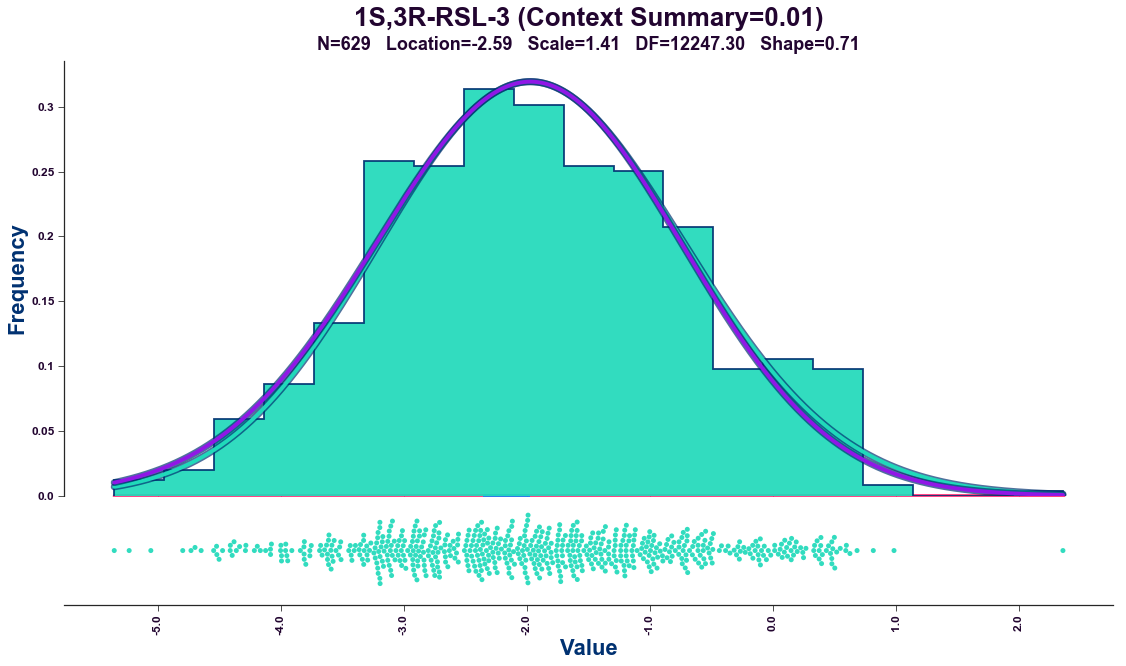

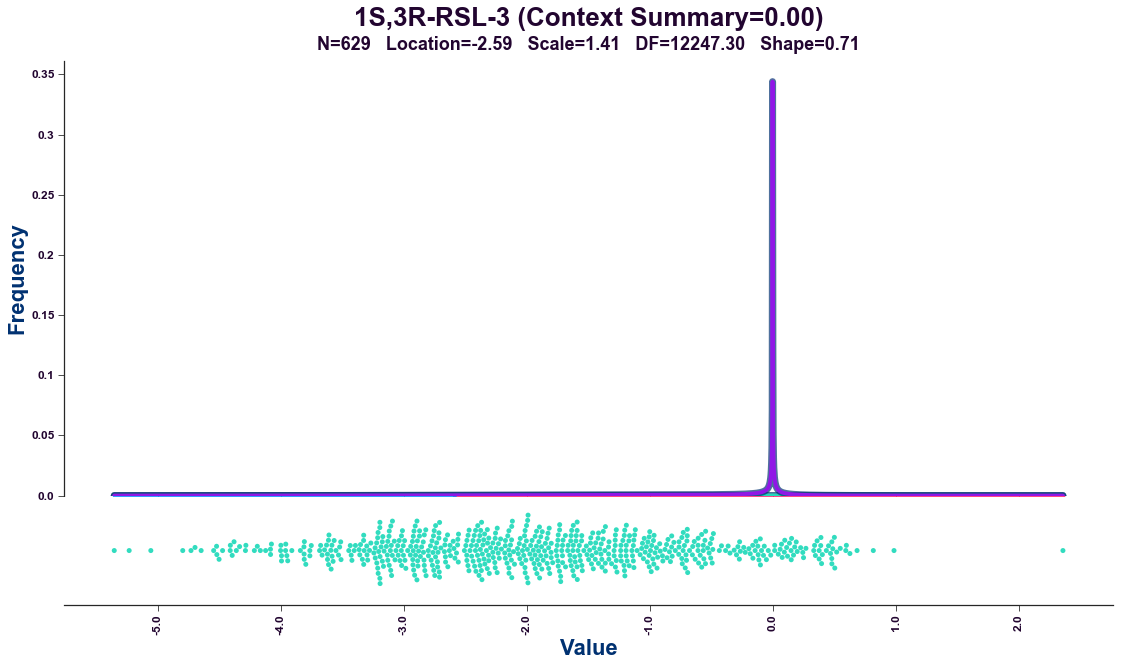

0.000336943776249 2.29869508624


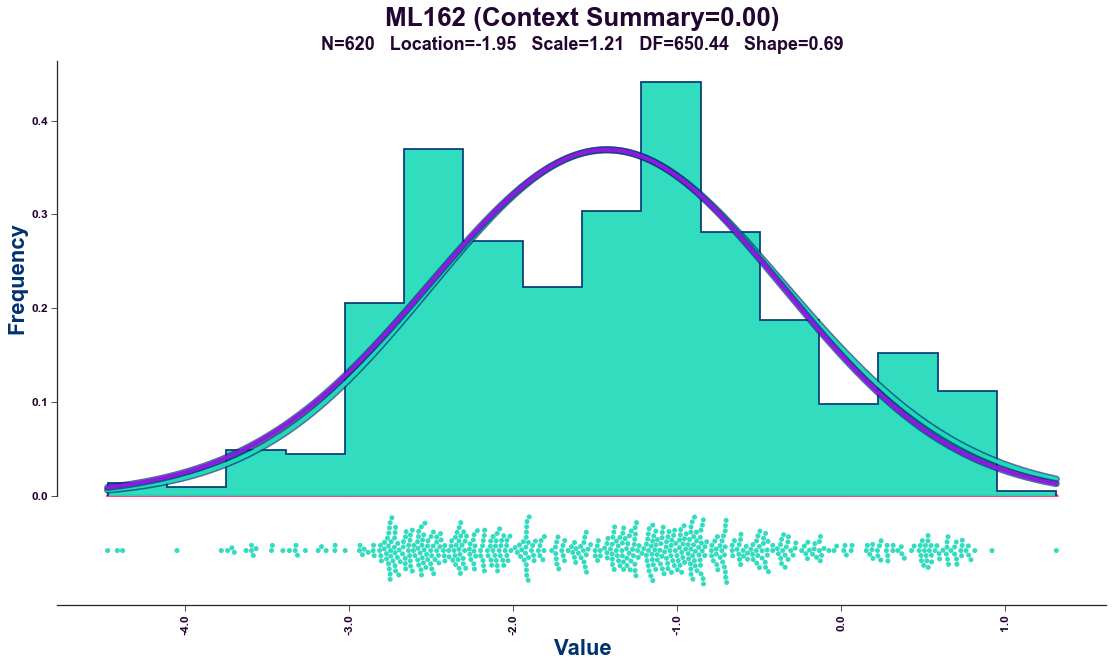

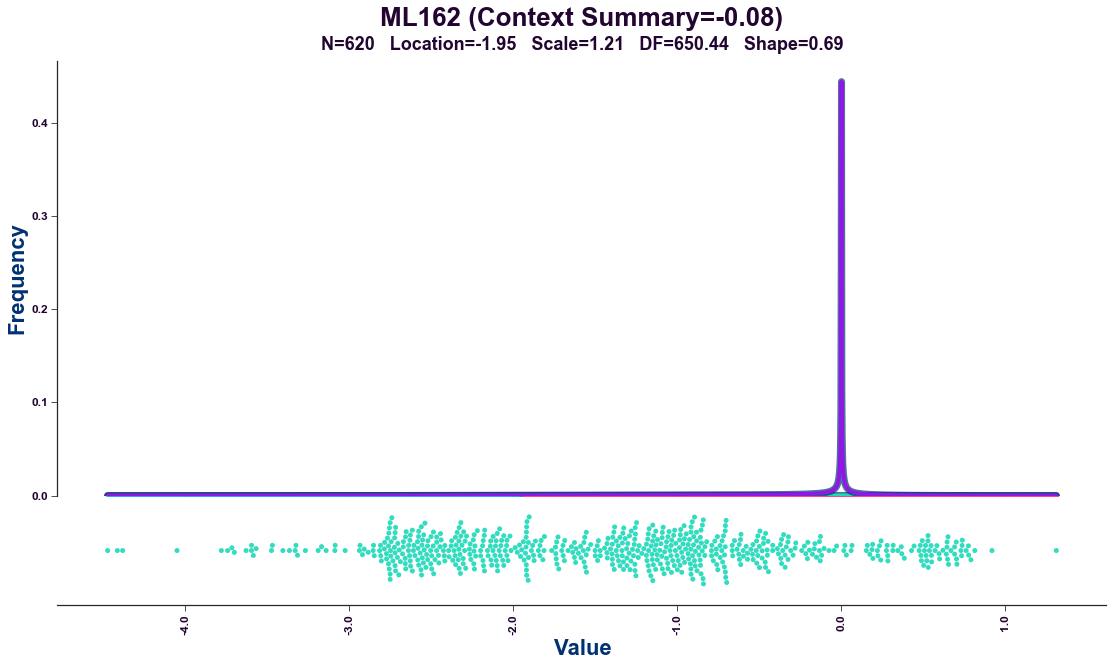

0.000922959753568 6.9555042204


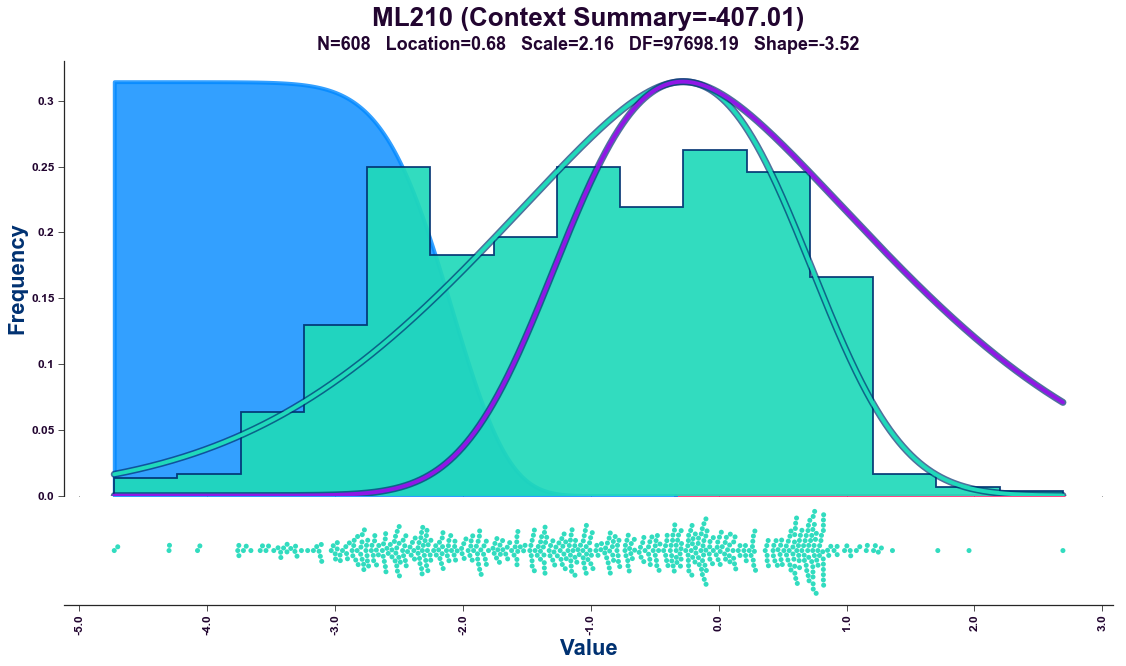

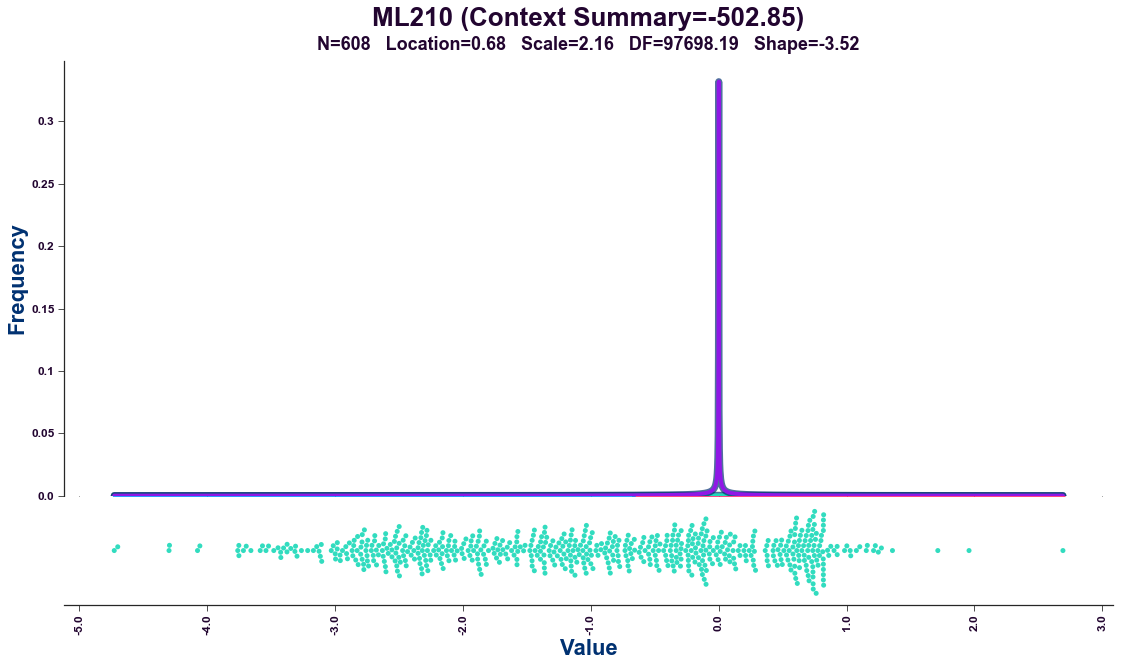

0.000169826829613 1.2777487428


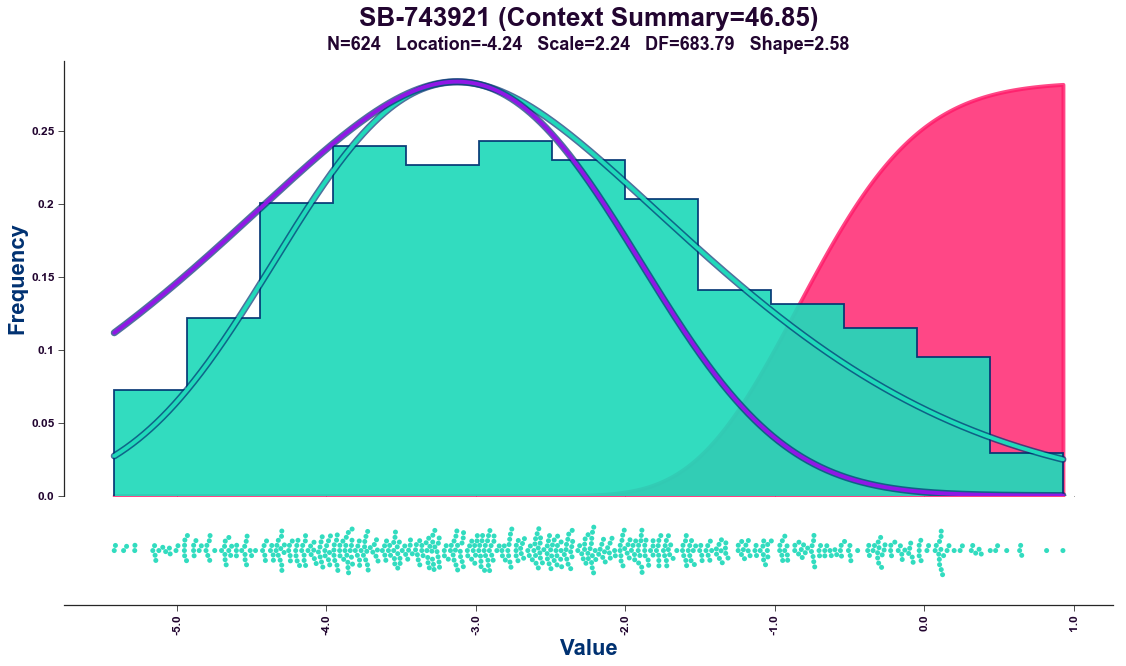

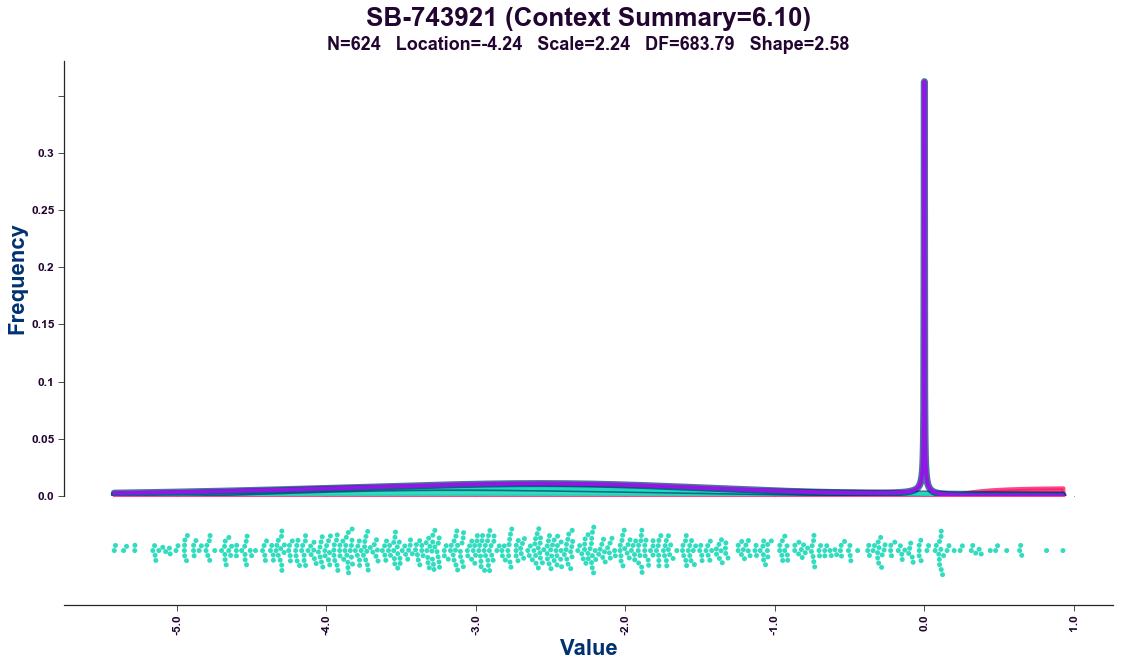

0.000200361692096 3.66916483407


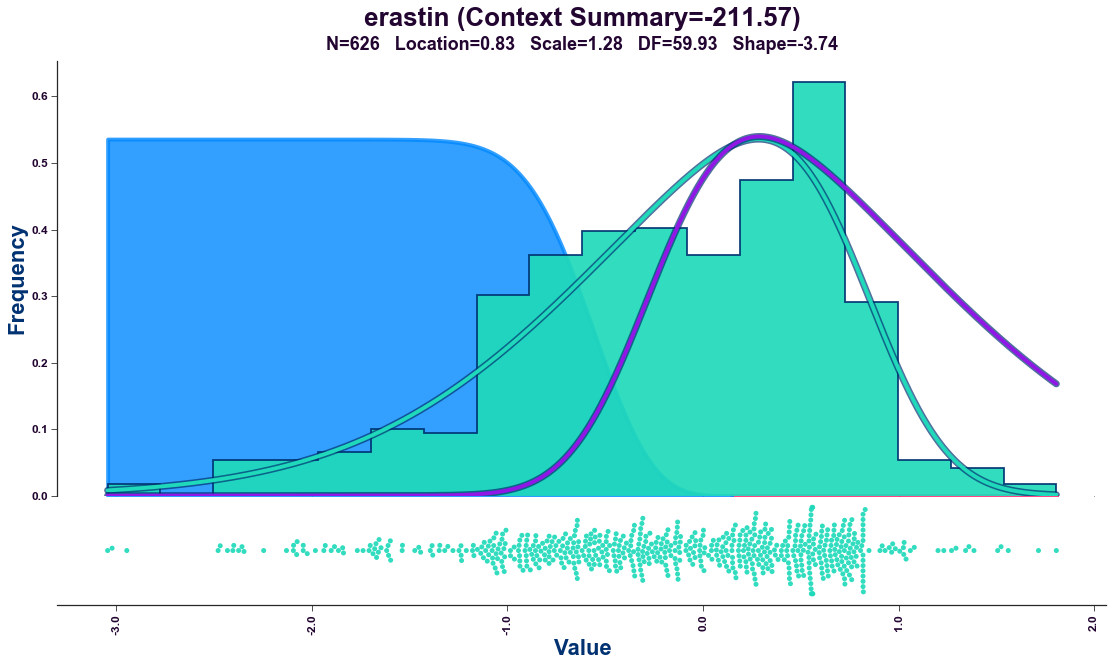

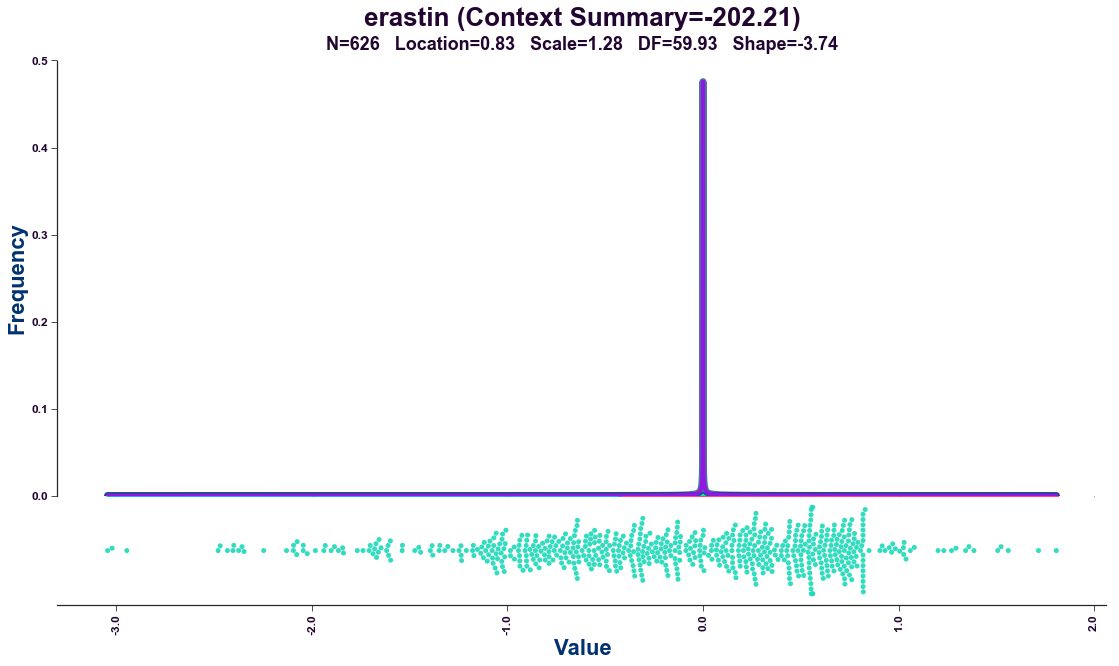

0.000184907756141 1.03694015873


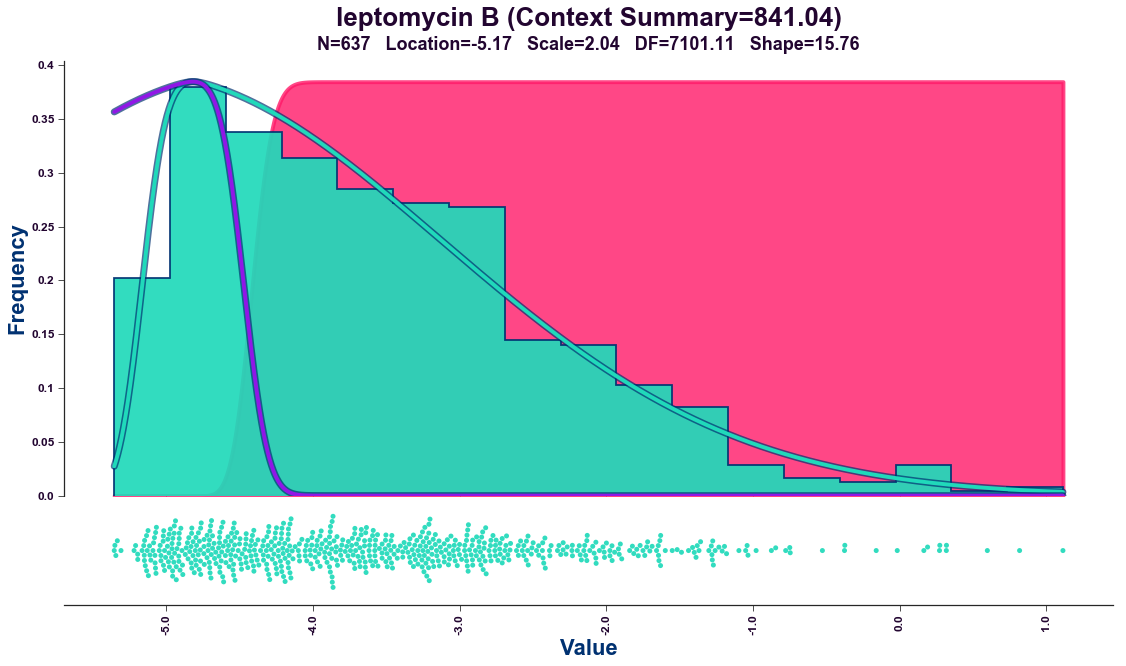

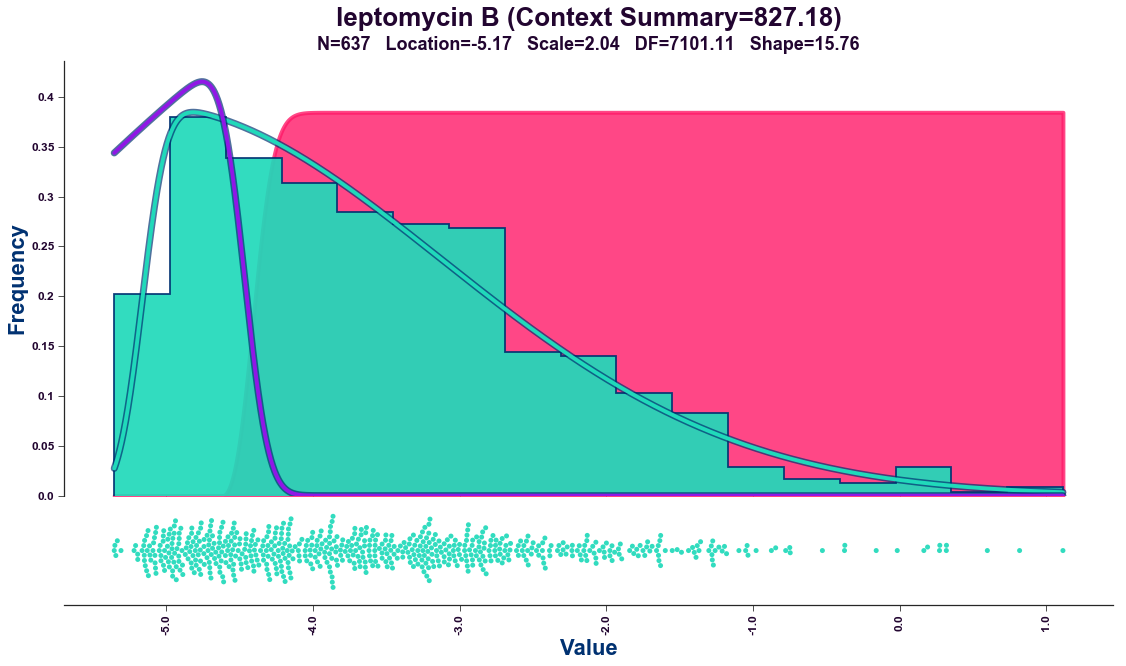

0.000328721785297 1.71380489561


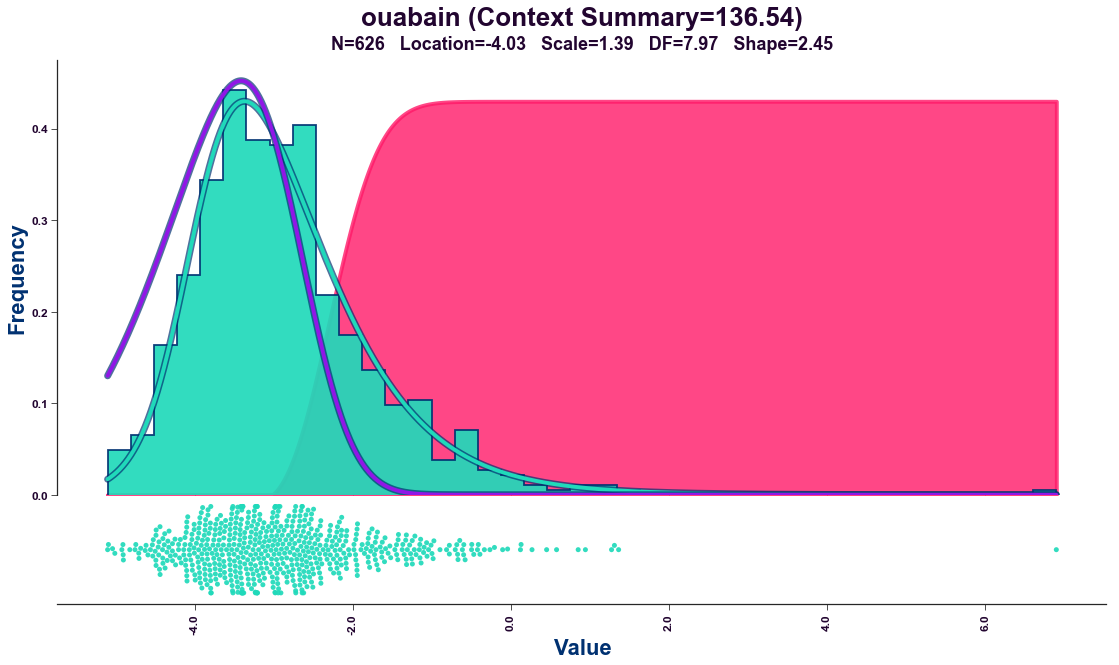

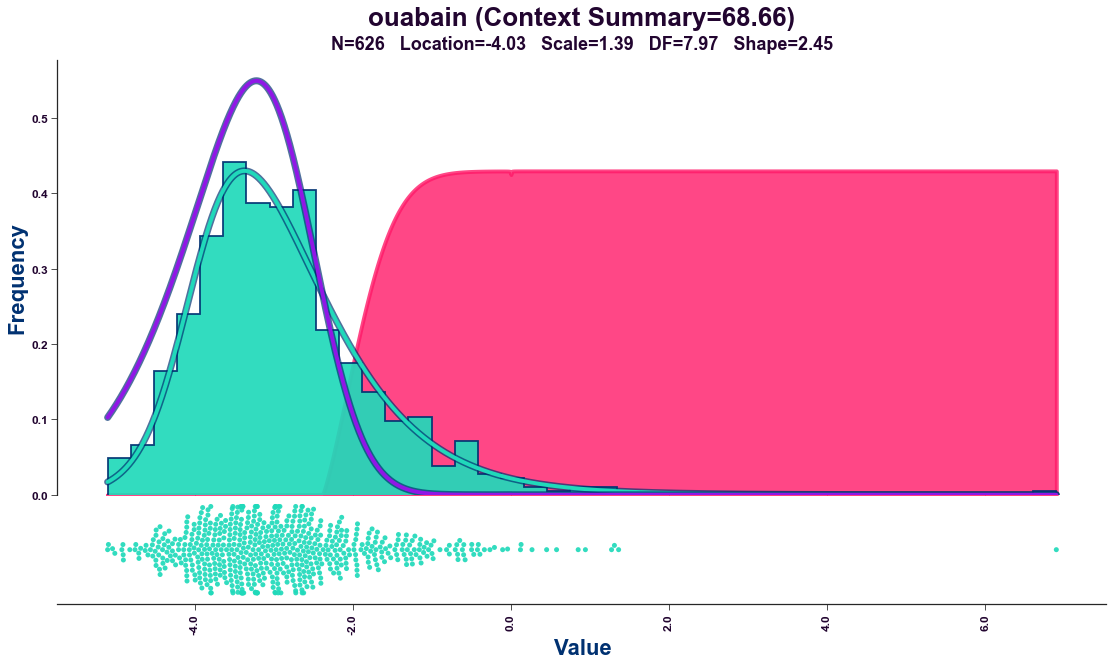

In [36]:
for feature, feature_vector in compound_x_cell_line.iterrows():

    if feature not in (
            '1S,3R-RSL-3',
            'ML162',
            'ML210',
            'erastin',
            'leptomycin B',
            'SB-743921',
            'ouabain', ):
        continue

    plot_context(
        feature_vector.dropna(), feature, add_context_summary_to_title=True)

    plot_context(
        feature_vector.dropna(),
        feature,
        true_mean=0,
        add_context_summary_to_title=True)

    mpl.pyplot.show()